## 1- library Imports

In [2]:
import scipy as sp
from scipy import signal
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib notebook

# 2- Data Import and plotting
* Import the PPG signal data “PPG_record.txt” into your python environment and store it in a variable named “PPG_data”.
* The first column contains timestamp of samples, the second one contains red, the third one contains infrared (IR), and the last column contains green sensor data. 
* Take IR signal and store it in a variable called “PPG_sig”.  
* Note: the sampling frequency of this signal is 132 Hz. 
* Plot the IR signal stored in "PPG_sig" VS Time in seconds
* When plotting the data "PPG_sig" vs time in seconds, use the function np.linspace to make a seconds array using the length of "PPG_sig" and the sampling frequency of 132 Hz. Do not use the timestamp column of the data.

     HINT: 
         PPG_data = np.loadtxt(the directory of the PPG Data) 
         
         or
         
         PPG_data = pd.read_csv(the directory of the PPG Data, names = [name for each column])
         * Note: If you are using pandas to load into data, we'd recommend you convert pandas series data to numpy type for further analysis

<IPython.core.display.Javascript object>


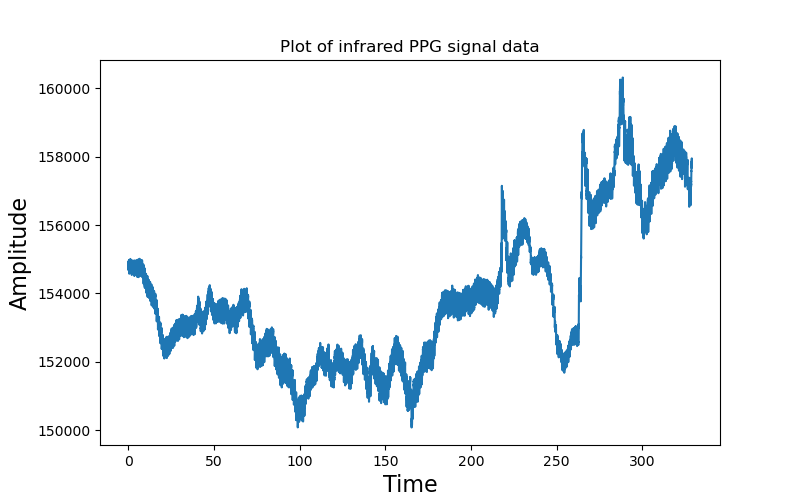

In [3]:
#code
fs=132
PPG_data = pd.read_csv("PPG_record.txt", names = ["timestamp", "red", "infrared", "green"])
PPG_sig = PPG_data[["infrared"]].to_numpy()
PPG_sig = (PPG_sig.T).flatten()

t = np.linspace(0,len(PPG_sig)/132,len(PPG_sig))

plt.figure(figsize=(8,5))
plt.title("Plot of infrared PPG signal data")
plt.xlabel("Time",fontsize=16)
plt.ylabel("Amplitude",fontsize=16)
plt.plot(t,PPG_sig)

# 3- Compute power spectral density (PSD)

 * Compute power spectral density (PSD) using the Welch method provided by scipy package.  Select only the frequencies between 0.7 and 3Hz since the human heart rate typically does not go beyond these limits. 
 * Plot the limited PSD versus frequency
 * Find the dominant PSD value and its corresponding frequency. 
 * Store the value of the found frequency component in a variable named “dominant_freq”. 
 * Reference:
 https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.welch.html#scipy.signal.welch
 
      
      HINT: 
        PSD_freqs , PSD = scipy.signal.welch() 
        Set the nperseg parameter to be = 10*Fs
        

<IPython.core.display.Javascript object>


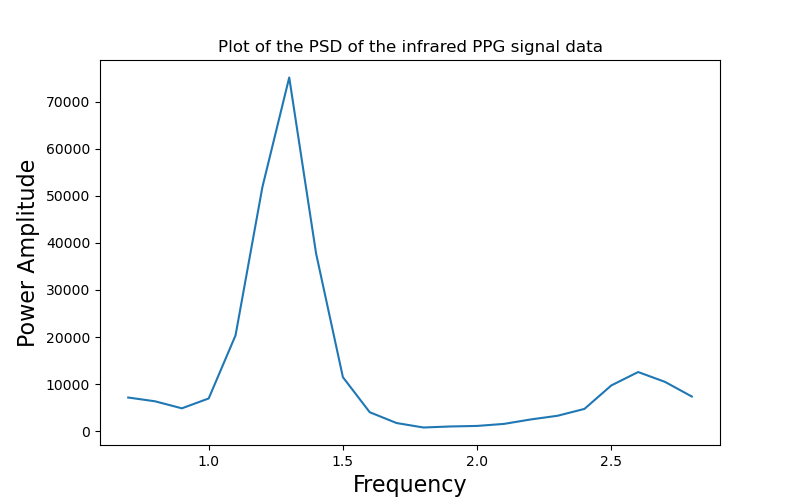


 Maximum value of PSD:  75103.19231029775

Dominant frequency is:  [1.3] Hz


In [4]:
PSD_freqs , PSD = sp.signal.welch(PPG_sig,fs=132, nperseg=10*fs)

# code
small = np.amin(np.where(PSD_freqs > 0.7))
#find the smallest index with the value >0.7Hz

big = np.amax(np.where(PSD_freqs < 3))
#find the largest index with the value <3Hz                                       
                                       
plt.figure(figsize=(8,5))
plt.title("Plot of the PSD of the infrared PPG signal data")
plt.xlabel("Frequency",fontsize=16)
plt.ylabel("Power Amplitude",fontsize=16)
plt.plot(PSD_freqs[small:big],PSD[small:big])

new_PSD_freqs = PSD_freqs[small:big]
new_PSD = PSD[small:big]

print("\n","Maximum value of PSD: ",max(new_PSD))
# print("\n index of max value: ",np.where(new_PSD == max(new_PSD)))
dominant_freq = new_PSD_freqs[np.where(new_PSD == max(new_PSD))]
print("\nDominant frequency is: ",dominant_freq,"Hz")

# 4- Band Pass Filter Design and Filtering of PPG signal
*  Design a band pass filter. Use Butterworth filter of order 4 with cutoff frequencies equal to (dominant_freq – 0.3) and (dominant_freq + 0.3).

* Filter the original PPG signal with the designed filter. 

* Plot the filtered PPG signal showing heartbeats in the form of a sinusoid


* Note: the documentation of scipy package online is very comprehensive and informative. there are examples that 
  you can easily follow and use to solve the given exercise here. 
  https://docs.scipy.org/doc/scipy-0.14.0/reference/signal.html    
    
   
      HINT: 
        from scipy.signal import butter, filtfilt, freqz
    

<IPython.core.display.Javascript object>


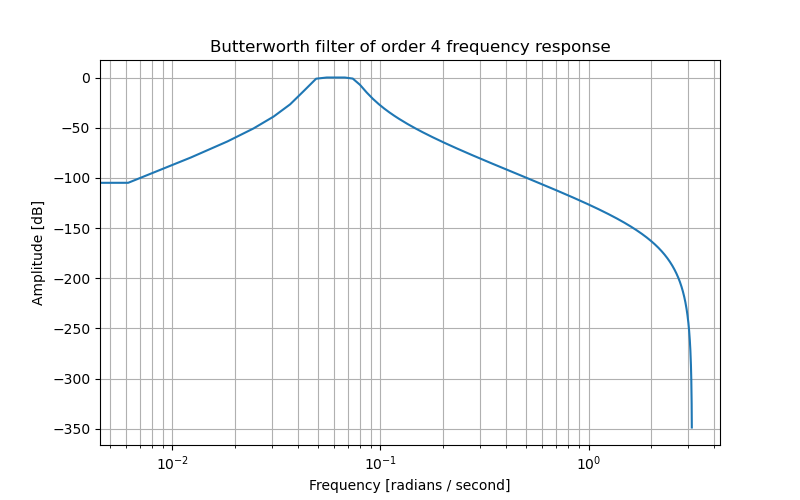

<IPython.core.display.Javascript object>


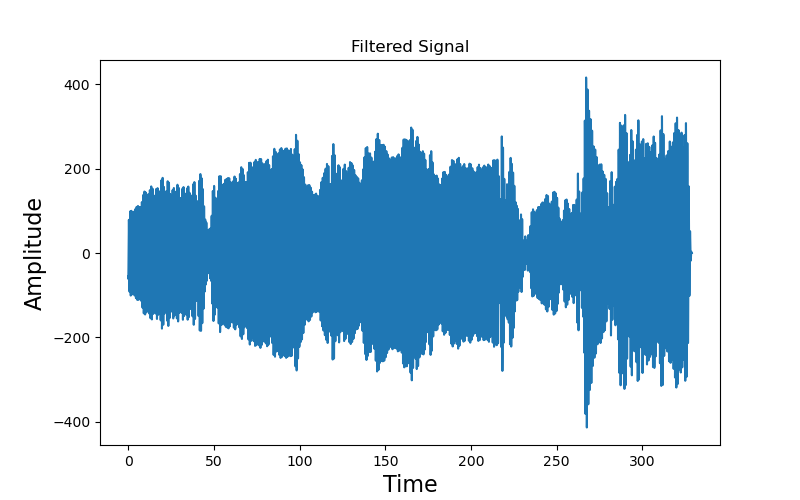

<IPython.core.display.Javascript object>


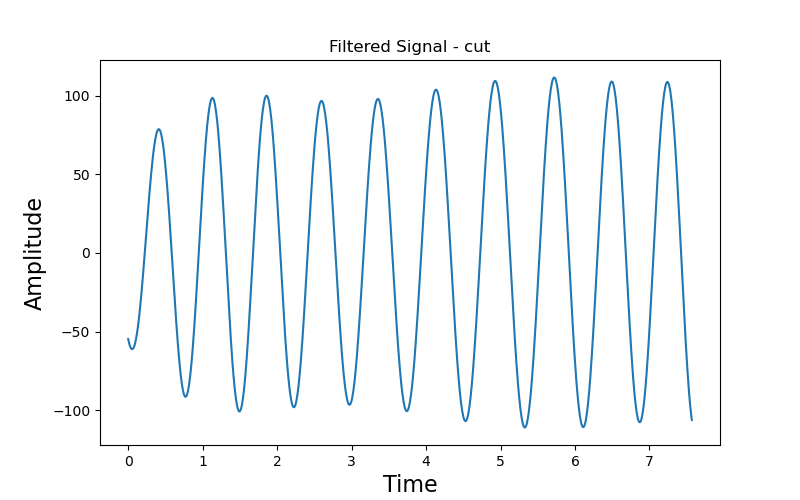

In [5]:
# code
#Butterworth filter of order 4
b4, a4 = sp.signal.butter(4, [dominant_freq-0.3,dominant_freq+0.3], btype='bandpass', output='ba', fs=132)

#freqz
w4,h4 = sp.signal.freqz(b4, a4)

output_PPG = signal.filtfilt(b4, a4, PPG_sig)

#plot for bw order 4
plt.figure(figsize=(8,5))
plt.semilogx(w4, 20 * np.log10(abs(h4)))
plt.title('Butterworth filter of order 4 frequency response')
plt.xlabel('Frequency [radians / second]')
plt.ylabel('Amplitude [dB]')
#plt.margins(0, 0.1)
plt.grid(which='both', axis='both')
#plt.axvline(100, color='green') # cutoff frequency
plt.show()

#plot for the filtered signal
plt.figure(figsize=(8,5))
plt.title("Filtered Signal")
plt.xlabel("Time",fontsize=16)
plt.ylabel("Amplitude",fontsize=16)
plt.plot(t,output_PPG)

#plot for the cut filtered signal (to see better)
plt.figure(figsize=(8,5))
plt.title("Filtered Signal - cut")
plt.xlabel("Time",fontsize=16)
plt.ylabel("Amplitude",fontsize=16)
plt.plot(t[:1000],output_PPG[:1000])

## Observations:
<br> After applying the filter on the raw PPG we can see that we got rid of the noise and the oscilating shape of the signal, making it centered around the 0 value for the amplitude. The most important peaks are easier to see now on the whole signal. Also, we can see the heatbeats in the form of a sinusoid, the rising edge representing the contraction stage of the heart, while the falling edge represents the relaxing stage of the heartbeat.<br><br>

# 5- Find the maximum extrema points (or peaks) of the signal
* The distance between every two consecutive peak location correlates with the RR interval.
* Find the peaks of the filtered signal in the time domain.
* Calculate these peak-to-peak intervals, store it in a variable named “RR_intervals” and report the average value of these intervals. 
* Convert the computed average value to heart rate as shown below and report it
* You can use “argrelextrema” function in scipy package for peak detection
* Plot Filtered PPG With peak locations
* Describe your observations below
* Reference: https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.argrelextrema.html

      HINT:
        from scipy.signal import argrelextrema
        HeartRate = 60.0/avg_peak_intervals 

<IPython.core.display.Javascript object>


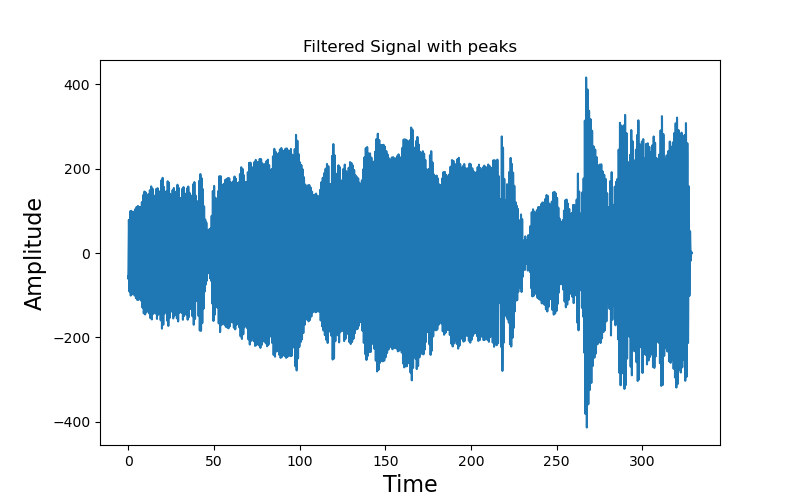

Heartrate:  78.446623713541 bpm


In [6]:
#code
RR_values_init = sp.signal.argrelextrema(output_PPG, np.greater)
RR_values = RR_values_init[0]

RR_intervals = [None]*(len(RR_values)-1)

#plot for the filtered signal
plt.figure(figsize=(8,5))
plt.title("Filtered Signal with peaks")
plt.xlabel("Time",fontsize=16)
plt.ylabel("Amplitude",fontsize=16)
plt.plot(t,output_PPG)
# for i in RR_values:
#     plt.scatter(t[i],output_PPG[i])

j = 0
for i in range(len(RR_values)-1):
    RR_intervals[j]=t[RR_values[i+1]]-t[RR_values[i]]
    j = j + 1
        
avg_peak_intervals = sum(RR_intervals)/len(RR_intervals)
heartrate = 60.0/avg_peak_intervals
print("Heartrate: ",heartrate,"bpm")

## Observations: 
   <br> As expected, we see that only the top peaks are highlighted (as we considered one positive peak and one negative peak as two consecutive peaks). The average heartrate is within parameters, maybe just a little bit high, since the normal average heartrate of an aduls is around 72 bpm. This can be due to the age or the level if exertion of the subject. <br><br>

# 6- Calculate AVNN, SDNN and RMSSD
* AVNN is average of the time interval between successive normal heart beats. 
* SDNN is standard deviation of the time interval between successive normal heart beats (i.e. the RR-intervals).
* RMSSD is the Root mean square of successive RR interval differences.

* Calculate AVNN, SDNN and RMSSD from the “RR_intervals” variable. 
* These are heart rate variability parameters. Report the AVNN, SDNN and RMSSD values. 
* RMSSD formula can be found in https://www.biopac.com/application/ecg-cardiology/advanced-feature/rmssd-for-hrv-analysis/

* Note: Time unit for intervals should be in millisecond.
   
   HINT:
        Use np.diff(RR_intervals) to calculate the difference between successive rr intervals
        Use np.std() for SDNN

In [6]:
#code

AVNN=1000*sum(RR_intervals)/len(RR_intervals)
print("AVNN = ",AVNN,"[ms]")

SDNN=1000*np.std(RR_intervals)
print("SDNN =",SDNN,"[ms]")

RMSSD=1000*np.sqrt((1/(len(RR_intervals)-1))*sum((np.diff(np.diff(RR_intervals)))**2))
print("RMSSD =",RMSSD,"[ms]")

AVNN =  764.8512728743883 [ms]
SDNN = 64.58627304611122 [ms]
RMSSD = 47.87380289077836 [ms]


## Observations:
   <br> For the AVNN, our value is within normal parameters (600-1200 ms), however, our SDNN shows us that our patient presents a moderate risk for chronic heart failure (CHF) or acute myocardial infarction (AMI) (because a value of the SDNN between 50 and 100 indicates moderate risk, while a value of over 100 ms is normal). The RMSSD is within normal parameters for a young or middle aged person.<br><br>